# COMS7050A Lab 1#

Course: Masters by Coursework

Student Name: Musawenkosi Ntuli

Student Number: 259788

In [4]:
# OpenCV: computer vision library 
import cv2
# NumPy: n-dimensional arrays and math 
import numpy as np
# SciPy: scientific computing and stats 
import scipy.stats
# scikit-image: image processing and color conversion 
import skimage
# ImageIO: easy image/video reading/writing 
import imageio
# mpmath: arbitrary precision floating point operations 
import mpmath
# matplotlib: plotting 
import matplotlib.pyplot as plt
# seaborn: matplotlib wrapper 
import seaborn as sns
# Python Image Library: alternative image processing 
import PIL


## Import Images ##


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!pwd

In [5]:
!unzip -q "/content/drive/My Drive/puzzle-images.zip"

## Read and Display images ##


Text(0.5, 1.0, 'Mask110')

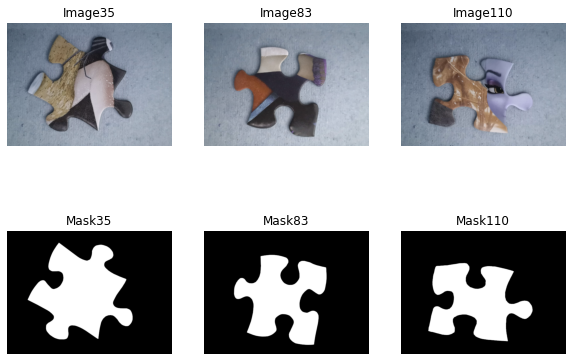

In [ ]:
# code for displaying multiple images in one figure

# create figure
fig = plt.figure(figsize=(10, 7))

# setting values to rows and column variables
rows = 2
columns = 3

# reading images
Image35 = cv2.imread('image-35.jpg')
Image83 = cv2.imread('image-83.jpg')
Image110 = cv2.imread('image-110.jpg')
Mask35 = cv2.imread('mask-35.png')
Mask83 = cv2.imread('mask-83.png')
Mask110 = cv2.imread('mask-110.png')

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(Image35)
plt.axis('off')
plt.title("Image35")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(Image83)
plt.axis('off')
plt.title("Image83")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# showing image
plt.imshow(Image110)
plt.axis('off')
plt.title("Image110")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)

# showing image
plt.imshow(Mask35)
plt.axis('off')
plt.title("Mask35")


# Adds a subplot at the 5th position
fig.add_subplot(rows, columns, 5)

# showing image
plt.imshow(Mask83)
plt.axis('off')
plt.title("Mask83")

# Adds a subplot at the 6th position
fig.add_subplot(rows, columns, 6)

# showing image
plt.imshow(Mask110)
plt.axis('off')
plt.title("Mask110")

## Convert images from GBR to RGB ##

In [ ]:
Image35 = Image35[:, :, ::-1]
Image83 = Image83[:, :, ::-1]
Image110 = Image110[:, :, ::-1]
 

 

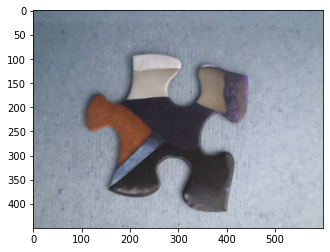

In [ ]:
 plt.imshow(np.moveaxis(Image83, 1, 1))


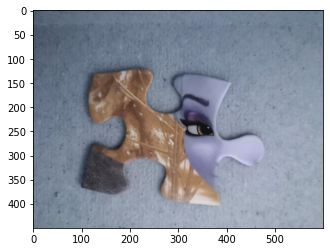

In [ ]:
 plt.imshow(np.moveaxis(Image110, 1, 1))

In [ ]:
im = Image110/255.0
print(im.shape) 


(450, 600, 3)


## RGB to Grayscale ##

In [ ]:
from skimage.color import rgb2gray

Text(0.5, 1.0, 'Grayscale - Image-83')

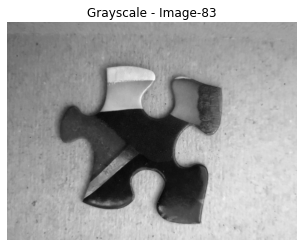

In [ ]:

# showing image
grayscale83 = rgb2gray(Image83)
plt.imshow(grayscale83,cmap='gray')
plt.axis('off')
plt.title("Grayscale - Image-83")


Text(0.5, 1.0, 'Grayscale - Image-35')

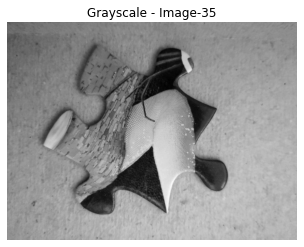

In [ ]:
grayscale35 = rgb2gray(Image35)
plt.imshow(grayscale35,cmap='gray')
plt.axis('off')
plt.title("Grayscale - Image-35")

Text(0.5, 1.0, 'Grayscale - Image-110')

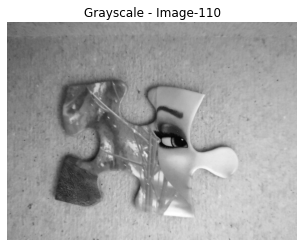

In [ ]:
grayscale110 = rgb2gray(Image110)
plt.imshow(grayscale110,cmap='gray')
plt.axis('off')
plt.title("Grayscale - Image-110")

HSV

In [ ]:
from skimage.color import rgb2hsv

Text(0.5, 1.0, 'HSV - Image35')

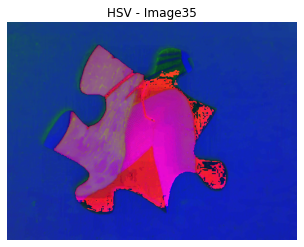

In [ ]:
hsv35 = rgb2hsv(Image35)
plt.imshow(hsv35)
plt.axis('off')
plt.title("HSV - Image35")

Text(0.5, 1.0, 'HSV - Image83')

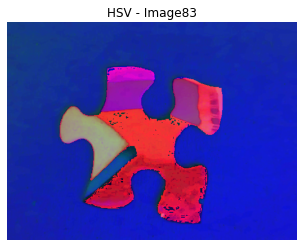

In [ ]:
hsv83 = rgb2hsv(Image83)
plt.imshow(hsv83)
plt.axis('off')
plt.title("HSV - Image83")

Text(0.5, 1.0, 'HSV - Image110')

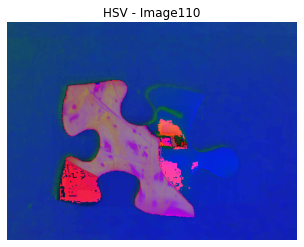

In [ ]:
hsv110 = rgb2hsv(Image110)
plt.imshow(hsv110)
plt.axis('off')
plt.title("HSV - Image110")

## 4 Descriptive Statistics ##


Convert an image to uint8


In [ ]:
Image35 = cv2.normalize(src=Image35, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

In [ ]:
height, width = Image35.shape[:2]

### 4.1 What is the width of the image? ###

In [ ]:
print("Width of image-35 is: ", width)

Width of image-35 is:  600


### 4.2 What is the height of the image? ###


In [ ]:
print("Height of image-35 : ", height)

Height of image-35 :  450


### 4.3 How many pixels are in the image in total? ###

In [ ]:
print ( "Total pixels on image-35 :", width * height * 3)

Total pixels on image-35 : 810000


In [ ]:
# reading the image data from desired directory

gray_mask35 = cv2.cvtColor(Mask35, cv2.COLOR_BGR2GRAY)

# apply threshold
w_threshold = (gray_mask35 >= 128) #white threshold
gray_mask35[w_threshold] = 255

b_threshold = (gray_mask35 < 128) # black threshold
gray_mask35[b_threshold] = 0
  
b_pixels = np.sum(gray_mask35 == 0)
w_pixels = np.sum(gray_mask35 == 255)


### 4.4 How many black pixels are there in the mask? ###

In [ ]:
print('Number of black pixels on Mask35 :', b_pixels)
#len(mask1[mask1 == 0]) 

Number of black pixels on Mask35 : 195427


### 4.5 How many white pixels are there in the mask? ###


In [ ]:
#print('Number of white pixels:', number_of_white_pix)
print('Number of black pixels on Mask35 :', w_pixels)

#len(mask1[mask1 == 1]) 

Number of black pixels on Mask35 : 74573


## Using the grayscale version of the image... ##


In [ ]:

gray_image35 = cv2.cvtColor(Image35, cv2.COLOR_BGR2GRAY)

### 4.6 What is the minimum pixel value in the image ###

In [ ]:
#Find the smallest pix
smallest = gray_image35.min()
print ("Minimum pixel for Image-35 :", smallest)

Minimum pixel for Image-35 : 7


### 4.7 What is the maximum pixel value in the image ###

In [ ]:
#Find the largest pix
largest = gray_image35.max()
print ("Maximum pixel for Image-35 :", largest)

Maximum pixel for Image-35 : 247


### 4.8 minimum and maximum pixel values of the puzzle pixels ###

In [1]:
piece1_gray[np.where(mask1 == 1)].min()
piece1_gray[np.where(mask1 == 1)].max()

NameError: ignored

In [ ]:
puzzle_min = gray_image35[np.where(Mask35 == 1)].min()
puzzle_max = np.round(np.max(grayscale35), 2)
print ("min pixel value" , puzzle_min, " and max pixel value ", puzzle_max)


#


IndexError: ignored

### 4.9 ###

In [2]:
piece1_gray[np.where(mask1 == 0)].min()
piece1_gray[np.where(mask1 == 0)].max()

NameError: ignored

In [ ]:
# Convert the mask to grayscale
grayMask110 = cv2.cvtColor(Mask110, cv2.COLOR_BGR2GRAY)

In [ ]:
#Find mask largest pixel
bg_pix = grayMask110.max(axis=(0, 1))

In [ ]:
bg_min = np.round(np.min(grayMask110[bg_pix]), 2)
bg_max = np.round(np.max(bg_pix), 2)
print ("Mask110 as background - min pixel value" , bg_min, " and max pixel value ", bg_max)

Mask110 as background - min pixel value 0  and max pixel value  255


### 4.10 What is the mean pixel intensity in the image ###

In [3]:
print ("Mean :", np.mean(piece1_gray))


NameError: ignored

In [ ]:
#Find the largest pix
gray110_mean = grayscale110.mean()
print ("Mean for Image110 :", gray110_mean)

Mean for Image110 : 0.5367658629745824


### 4.11 ###

In [ ]:
#function used to calculate brightness

def brightness( im_file ):
   im = Image.open(im_file).convert('L')
   stat = ImageStat.Stat(im)
   return stat.mean[0]

In [ ]:
#Display the image brightnes details
#brightness("mask-110.png")

### 4.12 ###

### 4.13 ###

### 4.14 ###

### Using the seaborn library... ###

In [ ]:
# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables SVG graphics inline (only use with static plots (non-Bokeh))
%config InlineBackend.figure_format = 'svg'

# Set JB's favorite Seaborn settings
rc={'lines.linewidth': 2, 'axes.labelsize': 18, 'axes.titlesize': 18, 
    'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)

import skimage.io

### 4.15 ###


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

Image110 = Image.open("image-110.jpg", 'r')

#Split the image into 3 channels
r, g, b = Image110.split()

In [ ]:
print ("Image mode: ", Image110.mode)

Image mode:  RGB


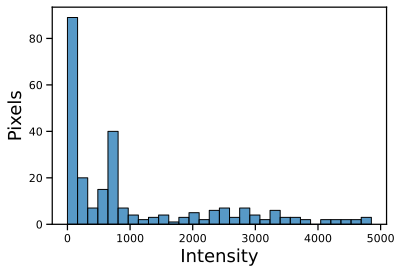

In [ ]:
channel_red_110 = sns.histplot(r.histogram(), bins=30)
channel_red_110.set(xlabel='Intensity', ylabel='Pixels')
plt.show()

### 4.16 ###


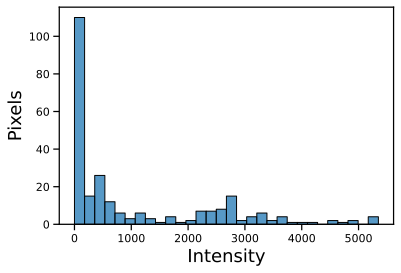

In [ ]:
#hist_green = sns.distplot(Image83[:, :, 1], color = "g", norm_hist = False)
channel_green_110 = sns.histplot(g.histogram(), bins=30)
channel_green_110.set(xlabel='Intensity', ylabel='Pixels')
plt.show()

### 4.17 ###

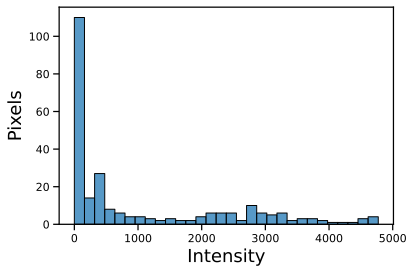

In [ ]:
channel_blue_110 = sns.histplot(b.histogram(), bins=30)
channel_blue_110.set(xlabel='Intensity', ylabel='Pixels')
plt.show()

### 4.18 ###


In [ ]:
from PIL import Image

mask110 = Image.open("mask-110.png")
mask110.load() # required for split()

background = Image.new("RGB", mask110.size, (255, 255, 255))
background.paste(mask110, mask=mask110.split()[3]) # is the alpha channel

background.save('bg_mask110.jpg', 'JPEG', quality=80)

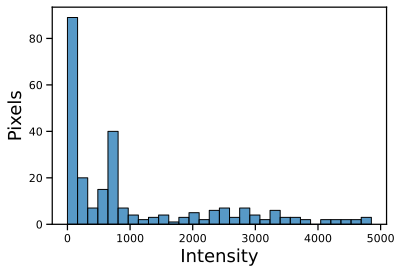

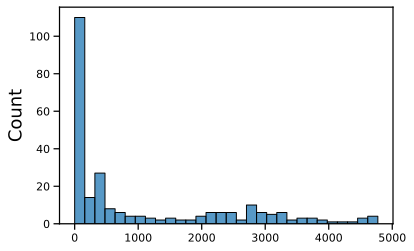

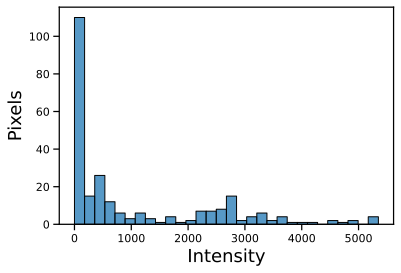

In [ ]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#from PIL import Image

bg_mask110 = Image.open("bg_mask110.jpg")
bg_mask110.load() # required for split()

#Split the image into 3 channels
red, blue, green = bg_mask110.split()

channel_red_mask110 = sns.histplot(r.histogram(), bins=30)
channel_red_mask110.set(xlabel='Intensity', ylabel='Pixels')
plt.show()

channel_blue_mask110 = sns.histplot(b.histogram(), bins=30)
channel_red_mask110.set(xlabel='Intensity', ylabel='Pixels')
plt.show()

channel_green_mask110 = sns.histplot(g.histogram(), bins=30)
channel_green_mask110.set(xlabel='Intensity', ylabel='Pixels')
plt.show()

### 4.19 ###

### 4.20 ###

### 4.21 ###

### 4.22 ###

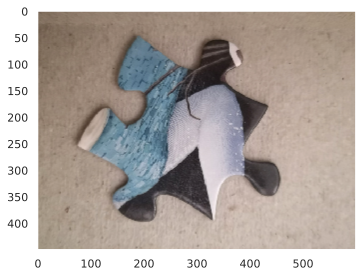

In [ ]:
# Load image
im_35 = skimage.io.imread('image-35.jpg')

# Display the image
with sns.axes_style('dark'):
    skimage.io.imshow(im_35 / im_35.max())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  


Text(0, 0.5, 'count')

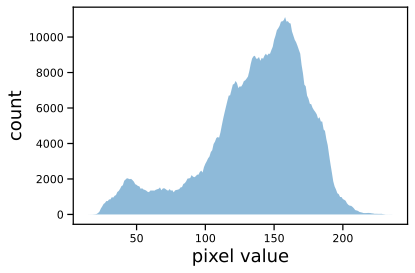

In [ ]:
# Get the histogram data
hist_phase, bins_phase = skimage.exposure.histogram(im_35)

# Use matplotlib to make a pretty plot of histogram data
plt.fill_between(bins_phase, hist_phase, alpha=0.5)

# Label axes
plt.xlabel('pixel value')
plt.ylabel('count')

### 5.2 Perform a histogram equalisation of the image  ###

In [ ]:
def histeq(im,nbr_bins=256):
  """  Histogram equalization of a grayscale image. """

  # get image histogram
  imhist,bins = histogram(im.flatten(),nbr_bins, density=True)
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = 255 * cdf / cdf[-1] # normalize

  # use linear interpolation of cdf to find new pixel values
  im2 = interp(im.flatten(),bins[:-1],cdf)

  return im2.reshape(im.shape), cdf

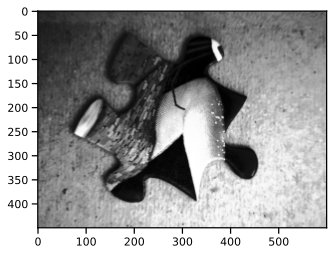

In [ ]:
from PIL import Image
from numpy import *

im = array(Image.open('image-35.jpg').convert('L'), 'f')
im2,cdf = histeq(im)

plt.imshow (im2,cmap='gray')
plt.show()

# Convert an image into floating point #

In [ ]:
#from PIL import Image

#f_img35 = array(Image.open('image-35.jpg').convert('L'),'f')
#print (f_img35.shape, f_img35.dtype)

#piece1 = 

# 6 Background Classifier #

In [6]:
import skimage.io as io
from skimage import data_dir

In [7]:
def imread_convert(f):
    return imread(f).astype(np.float32)

ic = io.ImageCollection('/images/*.jpg', load_func=imread_convert)

In [9]:
piece1 = skimage.img_as_float(skimage.io.imread('image-35.jpg')) #.astype(np.float32)
piece2 = skimage.img_as_float(skimage.io.imread('image-83.jpg'))
piece3 = skimage.img_as_float(skimage.io.imread('image-110.jpg'))

## 6.1 Image Convolution ##


In [11]:
def image_filter(image, kernel):
  kernel1 = kernel / ( np.sum(kernel) if np.sum(kernel) != 0 else 1 )
  #kernel = np.ones((5,5),np.float32)/25

  #filter the source image
  final_image = cv2.filter2D(image, -1, kernel1)

  #save the output image
  #cv2.imwrite('conv_image.jpg', final_image)
  return final_image

In [10]:
def convolve2D(image, kernel, padding='zero'):
    #get image size
    pad = int(kernel.shape[0] / 2)
    
    #output image
    output = np.zeros(image.shape)
    
    #apply zero-padding
    image = np.pad(image, (pad, pad), 'constant', constant_values=(0,0))
    
    #flip the kernel 180 degrees
    kernel = np.flipud(kernel)
    
    #perform image convolution not correlation
    for i in range(pad, image.shape[0] - pad):
        for j in range(pad, image.shape[1] - pad):
            output[i - pad, j - pad] = np.sum(np.multiply(kernel, image[i - pad: i + pad + 1, j - pad: j + pad + 1]))
    return output

### 6.2 Define filters | kernels ###


In [12]:
vp_filter = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]).astype('float32')
hp_filter = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]).astype('float32')
l_filter = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]).astype('float32')

#### Convert images to RGB and HSV ####

In [15]:
# Convert image to RGB
piece1_rgb = cv2.imread('image-35.jpg', cv2.COLOR_BGR2RGB) # cv2.IMREAD_COLOR)#[:, :, ::-1]

# Convert image to HSV
piece1_hsv = cv2.cvtColor(piece1_rgb, cv2.COLOR_BGR2HSV)


#### 6.2.1 Applying filters to images ####


#### Apply filters to RGB image ####


In [18]:
image_red = piece1_rgb[:,:,0]
image_green = piece1_rgb[:,:,1]
image_blue = piece1_rgb[:,:,2]

rgb_rpy = convolve2D(image_red, vp_filter)
rgb_bpy = convolve2D(image_blue, vp_filter)
rgb_gpy = convolve2D(image_green, vp_filter)

rgb_rpx = convolve2D(image_red, hp_filter)
rgb_bpx = convolve2D(image_blue, hp_filter)
rgb_gpx = convolve2D(image_green, hp_filter)

rgb_rl = convolve2D(image_red, l_filter)
rgb_bl = convolve2D(image_blue, l_filter)
rgb_gl = convolve2D(image_green, l_filter)


##### Apply filters to HSV image #####


In [19]:
hsv_red = piece1_hsv[:,:,0]
hsv_green = piece1_hsv[:,:,1]
hsv_blue = piece1_hsv[:,:,2]

hsv_rpy = convolve2D( hsv_red, vp_filter)
hsv_bpy = convolve2D( hsv_blue, vp_filter)
hsv_gpy = convolve2D( hsv_green, vp_filter)

hsv_rpx = convolve2D( hsv_red, hp_filter)
hsv_bpx = convolve2D( hsv_blue, hp_filter)
hsv_gpx = convolve2D( hsv_green, hp_filter)

hsv_rl = convolve2D( hsv_red, l_filter)
hsv_bl = convolve2D( hsv_blue, l_filter)
hsv_gl = convolve2D( hsv_green, l_filter)

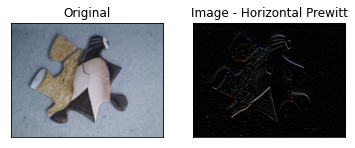

In [16]:
plt.subplot(121),plt.imshow(piece1_rgb),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(image_filter(piece1_rgb, hp_filter)),plt.title('Image - Horizontal Prewitt')
plt.xticks([]), plt.yticks([])
plt.show()

In [22]:


#result = np.vstack(rgb_rpy, rgb_gpy, rgb_bpy)

#plt.imshow(result)
#plt.axis('off')

#### 6.3 Applying the filters ####

#### Stacking the features for RGB image ####

In [24]:

features_rgb = np.vstack((
    rgb_rpy.flatten(),
    rgb_bpy.flatten(),
    rgb_gpy.flatten(),

    rgb_rpx.flatten(),
    rgb_bpx.flatten(),
    rgb_gpx.flatten(),

    rgb_rl.flatten(),
    rgb_bl.flatten(),
    rgb_gl.flatten()

))

In [25]:
#stack features for HSV

features_hsv = np.vstack((
    hsv_rpy.flatten(),
    hsv_bpy.flatten(),
    hsv_gpy.flatten(),

    hsv_rpx.flatten(),
    hsv_bpx.flatten(),
    hsv_gpx.flatten(),

    hsv_rl.flatten(),
    hsv_bl.flatten(),
    hsv_gl.flatten()

))

In [28]:
features_rgb = np.reshape(piece1_rgb, (450*600*3))

features.shape, features

((12, 270000), array([[ 4.43137255e-01,  4.43137255e-01,  4.35294118e-01, ...,
          6.78431373e-01,  6.74509804e-01,  6.74509804e-01],
        [ 3.72549020e-01,  3.72549020e-01,  3.64705882e-01, ...,
          6.27450980e-01,  6.23529412e-01,  6.35294118e-01],
        [ 3.17647059e-01,  3.17647059e-01,  3.09803922e-01, ...,
          5.92156863e-01,  5.88235294e-01,  5.96078431e-01],
        ...,
        [ 1.63000000e+02, -6.00000000e+00, -1.00000000e+01, ...,
         -1.00000000e+01,  3.00000000e+00, -3.00000000e+02],
        [ 2.27000000e+02, -6.00000000e+00, -1.00000000e+01, ...,
         -1.00000000e+01, -1.00000000e+00, -3.44000000e+02],
        [ 1.91000000e+02, -6.00000000e+00, -1.00000000e+01, ...,
         -1.00000000e+01,  5.00000000e+00, -3.18000000e+02]]))

In [ ]:
mask = np.cov(image, rowvar=False, bias=True)

In [ ]:
def calculateCovariance(X):
    meanX = np.mean(X, axis = 0)
    lenX = X.shape[0]
    X = X - meanX
    covariance = X.T.dot(X)/lenX
    return covariance

In [ ]:
calculateCovariance(mask)

array([[ 2.10558928,  2.19436165,  2.09970981, ...,  0.34000594,
         0.19408481,  0.0706434 ],
       [ 2.19436165,  4.60456795,  6.27570642, ..., -0.30412814,
        -0.46095362, -0.45172944],
       [ 2.09970981,  6.27570642,  9.6942602 , ..., -0.55528634,
        -0.82020542, -0.83315314],
       ...,
       [ 0.34000594, -0.30412814, -0.55528634, ...,  6.75792387,
         4.17259205,  1.64886718],
       [ 0.19408481, -0.46095362, -0.82020542, ...,  4.17259205,
         3.08554937,  1.78876643],
       [ 0.0706434 , -0.45172944, -0.83315314, ...,  1.64886718,
         1.78876643,  1.80878137]])

In [ ]:
print (mask)

[[ 5.28762469  4.67844938  3.6121284  ... -0.11891358 -0.19243457
  -0.30435556]
 [ 4.67844938  8.20880988 10.56105679 ... -0.72404938 -0.7419358
  -0.76497778]
 [ 3.6121284  10.56105679 17.06392099 ... -0.8697284  -0.99521975
  -1.14453333]
 ...
 [-0.11891358 -0.72404938 -0.8697284  ... 12.02580247  7.33301235
   2.66155556]
 [-0.19243457 -0.7419358  -0.99521975 ...  7.33301235  5.61146173
   3.31248889]
 [-0.30435556 -0.76497778 -1.14453333 ...  2.66155556  3.31248889
   3.7364    ]]


In [ ]:
def plotDataAndCov(data):
    ACov = np.cov(data, rowvar=False, bias=True)
    print ('Covariance matrix:\n', ACov)

    fig, ax = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(10, 10)

    ax0 = plt.subplot(2, 2, 1)
    
    # Choosing the colors
    cmap = sns.color_palette("GnBu", 10)
    sns.heatmap(ACov, cmap=cmap, vmin=0)

    ax1 = plt.subplot(2, 2, 2)
    
    # data can include the colors
    if data.shape[1]==3:
        c=data[:,2]
    else:
        c="#0A98BE"
    ax1.scatter(data[:,0], data[:,1], c=c, s=40)
    
    # Remove the top and right axes from the data plot
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)

In [ ]:
mask = mask.T
mask.shape

(600, 600)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


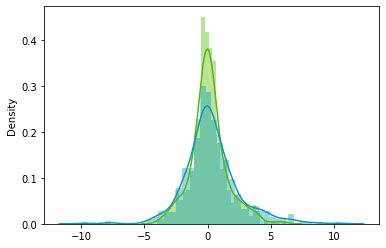

In [ ]:
sns.distplot(mask[:,0], color="#53BB04")
sns.distplot(mask[:,1], color="#0A98BE")
plt.show()
plt.close()

Covariance matrix:
 [[ 2.10558928  2.19436165  2.09970981 ...  0.34000594  0.19408481
   0.0706434 ]
 [ 2.19436165  4.60456795  6.27570642 ... -0.30412814 -0.46095362
  -0.45172944]
 [ 2.09970981  6.27570642  9.6942602  ... -0.55528634 -0.82020542
  -0.83315314]
 ...
 [ 0.34000594 -0.30412814 -0.55528634 ...  6.75792387  4.17259205
   1.64886718]
 [ 0.19408481 -0.46095362 -0.82020542 ...  4.17259205  3.08554937
   1.78876643]
 [ 0.0706434  -0.45172944 -0.83315314 ...  1.64886718  1.78876643
   1.80878137]]


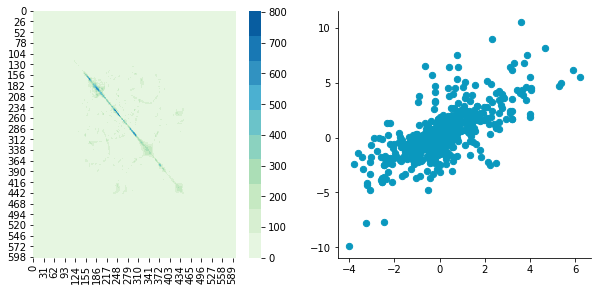

In [ ]:
plotDataAndCov(mask)
plt.show()
plt.close()